In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
cellphone=pd.read_csv(r'D:\Data Science\Python\Cellphone.csv')

In [4]:
cellphone.shape

(2000, 21)

In [5]:
cellphone.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
cellphone.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [7]:
X = cellphone.drop('price_range', 1)

C:\Users\GODWIN~1\AppData\Local\Temp/ipykernel_17004/3088643999.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = cellphone.drop('price_range', 1)


In [8]:
X[:4]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0


In [9]:
y = cellphone.iloc[:, -1]

In [10]:
y[:4]

0    1
1    2
2    2
3    2
Name: price_range, dtype: int64

# train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [12]:
X_test.shape

(600, 20)

# modeling

In [13]:
model = GaussianNB()

In [14]:
model.fit(X_train, y_train)

GaussianNB()

# prediction

In [15]:
y_pred = model.predict(X_test)

# model metrics

In [16]:
acc_score = accuracy_score(y_test, y_pred)

In [17]:
print(acc_score)

0.7783333333333333


In [18]:
y_test[:-20]

674     0
1699    0
1282    1
1315    1
1210    2
       ..
1925    2
16      3
1224    0
1537    2
1866    3
Name: price_range, Length: 580, dtype: int64

In [19]:
y_pred[:-20]

array([0, 1, 1, 0, 3, 1, 1, 2, 2, 3, 0, 3, 1, 1, 3, 0, 0, 1, 1, 2, 3, 3,
       1, 2, 3, 2, 2, 2, 1, 2, 2, 1, 2, 0, 3, 3, 0, 0, 1, 0, 1, 0, 2, 1,
       0, 1, 3, 2, 1, 2, 2, 3, 1, 3, 2, 3, 2, 3, 3, 1, 0, 2, 1, 2, 1, 2,
       1, 2, 3, 2, 1, 2, 0, 2, 3, 1, 2, 1, 0, 0, 0, 3, 2, 2, 3, 2, 2, 0,
       2, 1, 3, 0, 1, 2, 1, 2, 3, 0, 2, 3, 3, 3, 0, 2, 2, 1, 1, 1, 0, 2,
       0, 3, 1, 1, 2, 2, 3, 1, 1, 1, 2, 0, 0, 0, 3, 0, 1, 0, 1, 2, 0, 3,
       0, 3, 3, 0, 3, 2, 2, 1, 0, 0, 2, 1, 0, 3, 0, 1, 0, 1, 3, 3, 2, 1,
       0, 1, 1, 0, 3, 1, 3, 1, 3, 2, 3, 2, 2, 1, 3, 2, 2, 0, 2, 2, 0, 3,
       3, 0, 0, 3, 0, 3, 0, 0, 2, 3, 3, 1, 2, 2, 2, 3, 2, 3, 0, 1, 2, 3,
       3, 1, 3, 2, 0, 1, 2, 1, 2, 1, 0, 1, 0, 2, 1, 0, 2, 0, 2, 0, 1, 1,
       0, 1, 2, 1, 3, 3, 1, 2, 2, 1, 1, 2, 3, 3, 2, 1, 0, 1, 2, 1, 2, 3,
       2, 2, 0, 1, 2, 0, 3, 3, 3, 0, 2, 1, 0, 2, 1, 3, 2, 0, 3, 1, 1, 1,
       2, 1, 2, 0, 3, 2, 2, 1, 0, 1, 2, 3, 1, 1, 1, 2, 3, 1, 1, 2, 2, 0,
       0, 3, 0, 0, 1, 3, 2, 3, 0, 0, 2, 2, 3, 2, 1,

# confusion matrix

In [20]:
confusion_matrix(y_test, y_pred)

array([[118,  17,   0,   0],
       [ 14, 104,  31,   0],
       [  0,  30, 120,  18],
       [  0,   1,  22, 125]], dtype=int64)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       135
           1       0.68      0.70      0.69       149
           2       0.69      0.71      0.70       168
           3       0.87      0.84      0.86       148

    accuracy                           0.78       600
   macro avg       0.79      0.78      0.78       600
weighted avg       0.78      0.78      0.78       600



In [22]:
from yellowbrick.classifier import ConfusionMatrix


In [26]:
cm = ConfusionMatrix(model, classes=[0,1,2,3])

C:\Users\Godwin Joshua\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


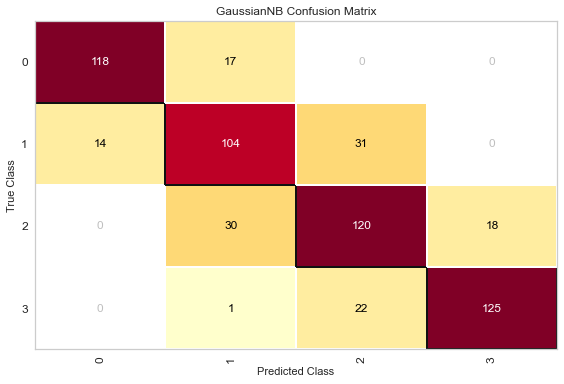

<AxesSubplot:title={'center':'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [27]:
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show()